## House Price

In [53]:
import pandas as pd

# Read data
df = pd.read_csv('HousePrice.csv', index_col=0)
print(df.shape)
print(df.head)
print(df.dtypes)

(1460, 26)
<bound method NDFrame.head of       OverallQual  TotRmsAbvGrd  BsmtFullBath  MasVnrArea  MSSubClass  \
0               7             8             1       196.0          60   
1               6             6             0         0.0          20   
2               7             6             1       162.0          60   
3               7             7             1         0.0          70   
4               8             9             1       350.0          60   
...           ...           ...           ...         ...         ...   
1455            6             7             0         0.0          60   
1456            6             7             1       119.0          20   
1457            7             9             0         0.0          70   
1458            5             5             1         0.0          20   
1459            5             6             1         0.0          20   

      FullBath  LotArea  BedroomAbvGr  Fireplaces  GarageCars  ...  BldgType  \
0 

(1460, 26) (1414, 26)


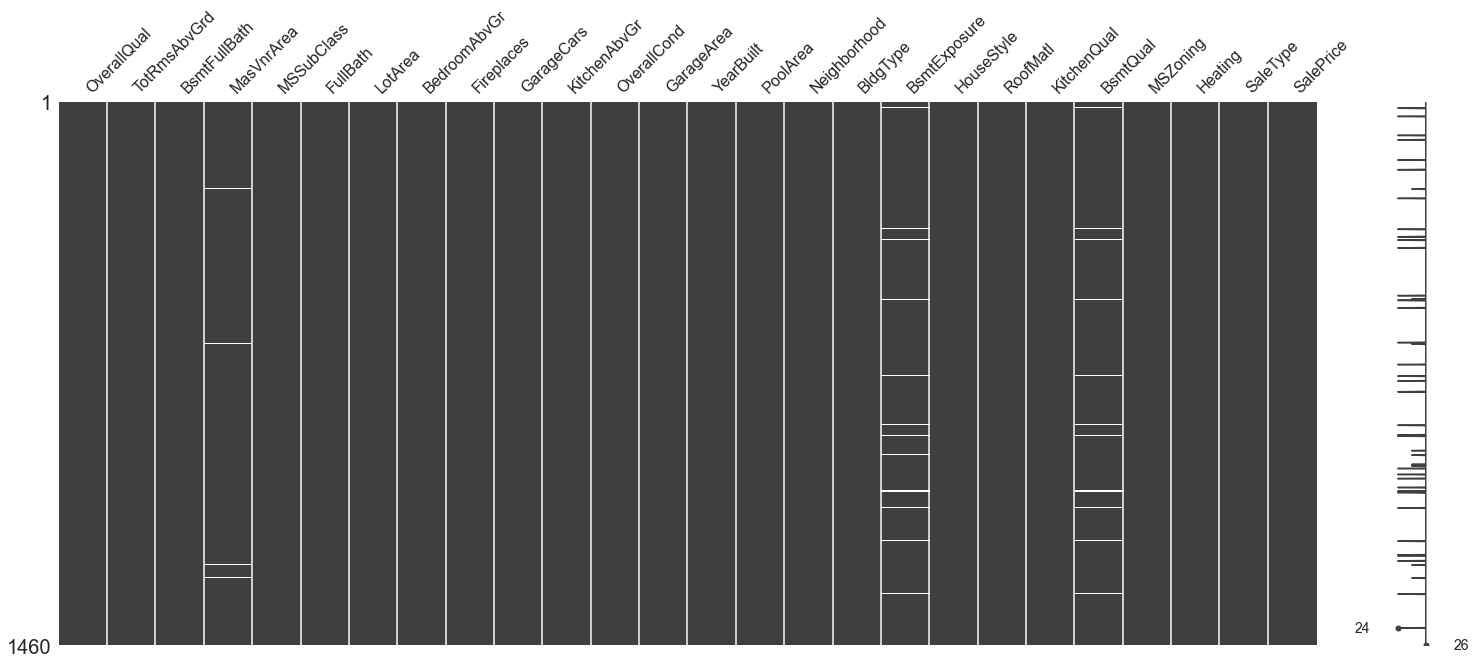

In [54]:
import missingno as msno

# Drop NA
df_dna = df.dropna()
print(df.shape, df_dna.shape)

msno.matrix(df);

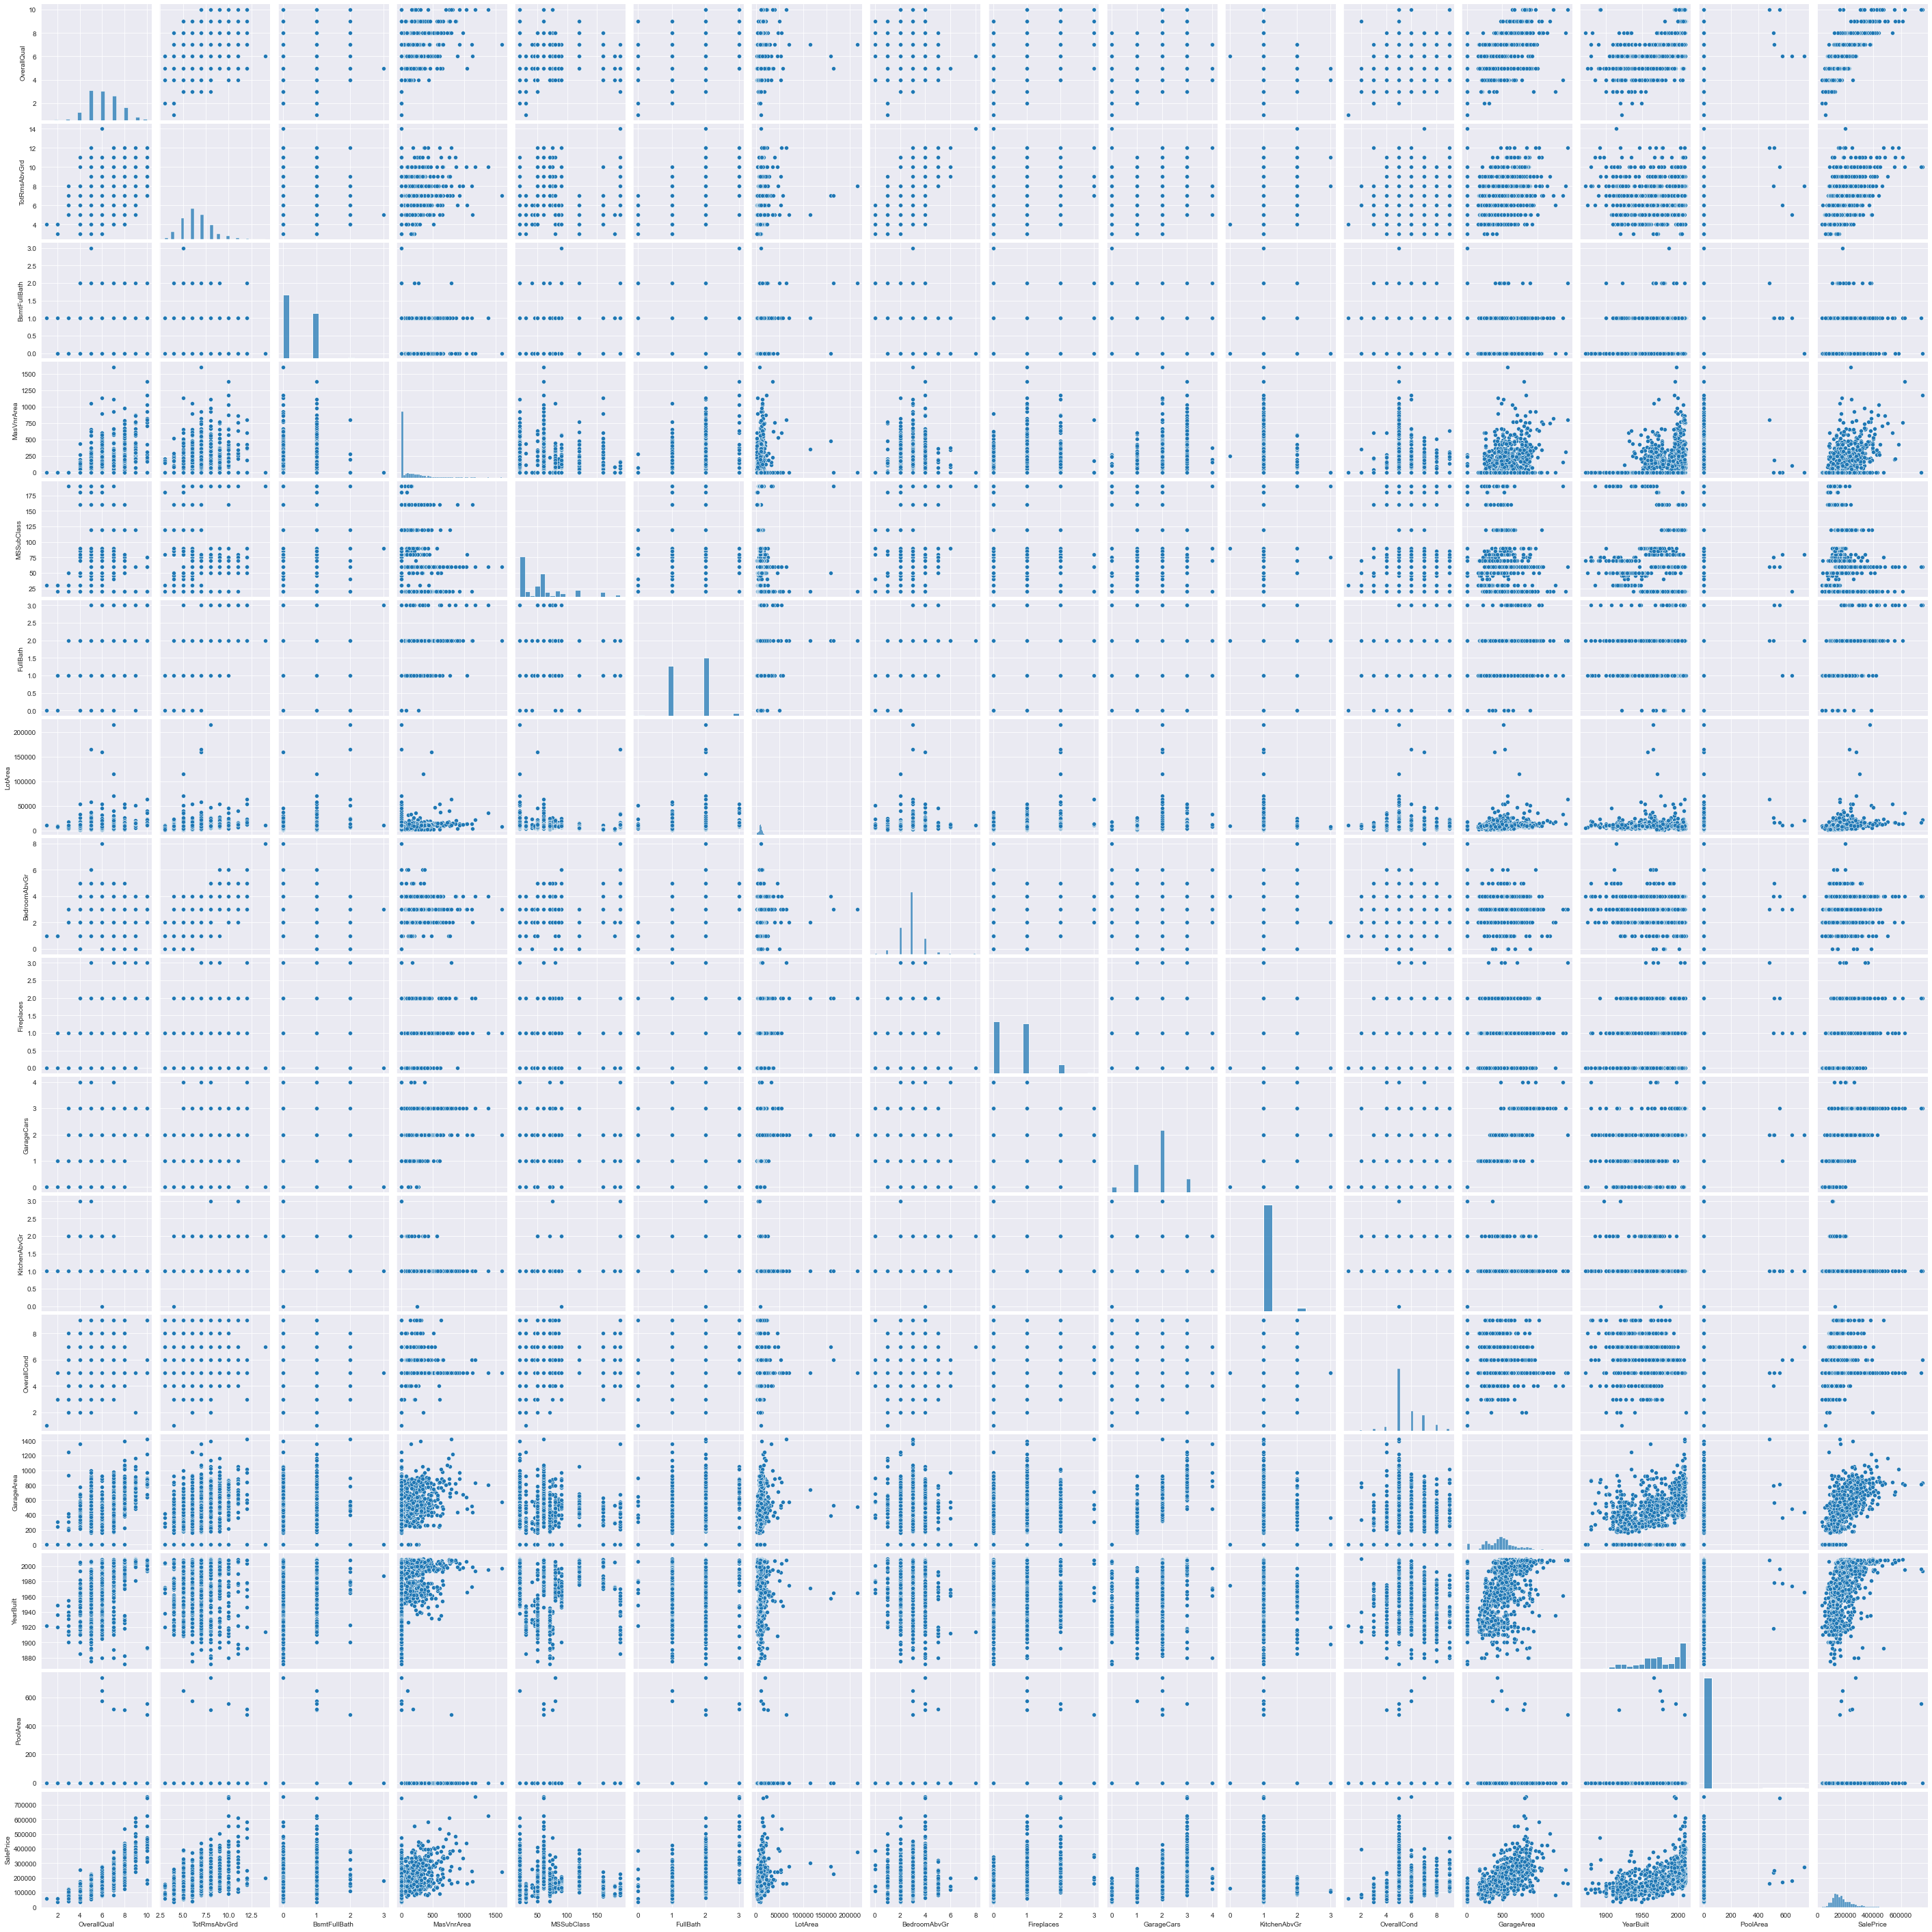

In [55]:
import seaborn as sns

sns.pairplot(data=df_dna)

In [56]:
# Normalize X and y
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

X = df_dna.iloc[:, :-1]
y = df_dna.SalePrice

minmax = MinMaxScaler()
ohe = OneHotEncoder()

X_num = X.select_dtypes(include=['int64', 'float64'])
X_cat = X.select_dtypes(include=[object])

X_minmax = pd.DataFrame(minmax.fit_transform(X_num))
X_ohe = pd.DataFrame(ohe.fit_transform(X_cat).toarray())

X_norm = pd.concat([X_minmax, X_ohe], axis=1, ignore_index=True)
print(X_norm.shape, X_minmax.shape, X_ohe.shape)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=1, test_size=0.3)

(1414, 91) (1414, 15) (1414, 76)


In [57]:
# Train MLR
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept of MLR is: ', linreg.intercept_)
print('Coefficients of MLR are: ', linreg.coef_)
print('R2 score of MLR is: ', linreg.score(X_test, y_test))

Intercept of MLR is:  1.71883575405694e+17
Coefficients of MLR are:  [ 1.00056413e+05  1.13086118e+05  3.43689487e+04  3.21886250e+04
 -3.83796044e+04  4.03630890e+04  1.10354347e+05 -3.83532187e+04
  2.88272205e+04  1.07991624e+04 -2.59242921e+04  4.76650943e+04
  4.01159308e+04  4.59008067e+04  9.82468662e+04  1.47092635e+15
  1.47092635e+15  1.47092635e+15  1.47092635e+15  1.47092635e+15
  1.47092635e+15  1.47092635e+15  1.47092635e+15  1.47092635e+15
  1.47092635e+15  1.47092635e+15  1.47092635e+15  1.47092635e+15
  1.47092635e+15  1.47092635e+15  1.47092635e+15  1.47092635e+15
  1.47092635e+15  1.47092635e+15  1.47092635e+15  1.47092635e+15
  1.47092635e+15  1.47092635e+15  1.47092635e+15  1.47092635e+15
  2.50549015e+16  2.50549015e+16  2.50549015e+16  2.50549015e+16
  2.50549015e+16 -2.19539752e+16 -2.19539752e+16 -2.19539752e+16
 -2.19539752e+16 -2.76161894e+16 -2.76161894e+16 -2.76161894e+16
 -2.76161894e+16 -2.76161894e+16 -2.76161894e+16 -2.76161894e+16
 -2.76161894e+16  1.0

## Titanic

In [58]:
# Read data
df = pd.read_csv('Titanic_Passengers.txt')
print(df.shape)
print(df.head)
print(df.dtypes)

(1309, 15)
<bound method NDFrame.head of       Passenger Class Survived  \
0                   1      Yes   
1                   1      Yes   
2                   1       No   
3                   1       No   
4                   1       No   
...               ...      ...   
1304                3       No   
1305                3       No   
1306                3       No   
1307                3       No   
1308                3       No   

                                                 Name     Sex      Age  \
0                       Allen, Miss. Elisabeth Walton  female  29.0000   
1                      Allison, Master. Hudson Trevor    male   0.9167   
2                        Allison, Miss. Helen Loraine  female   2.0000   
3                Allison, Mr. Hudson Joshua Creighton    male  30.0000   
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000   
...                                               ...     ...      ...   
1304                            

(1309, 15) (1043, 9)


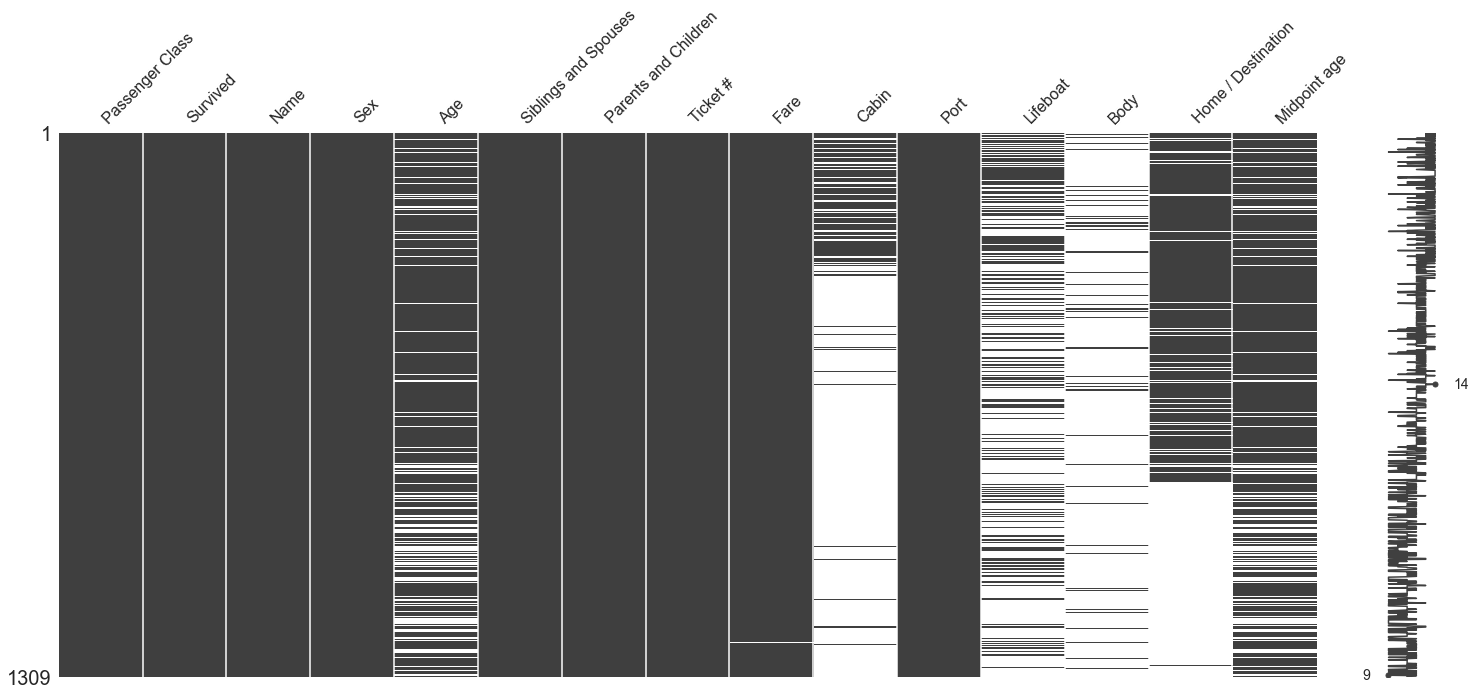

In [59]:
# Drop NA and insignificant features or features with too many na
df_dna = df.copy()
df_dna.drop(['Name', 'Ticket #', 'Cabin', 'Lifeboat', 'Body', 'Home / Destination'], axis=1, inplace=True)
df_dna.dropna(inplace=True)
print(df.shape, df_dna.shape)

msno.matrix(df);

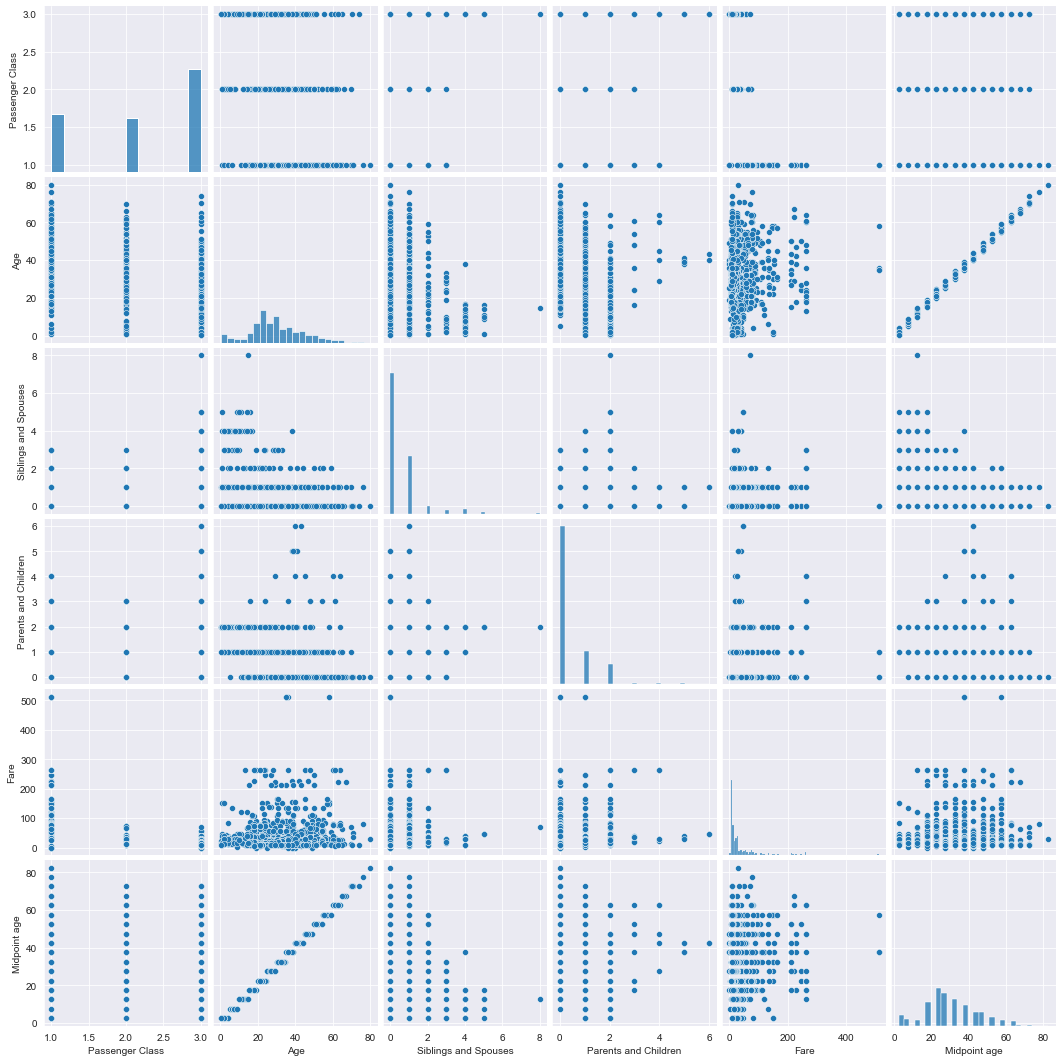

In [60]:
sns.pairplot(data=df_dna)

In [61]:
df_dna.head

<bound method NDFrame.head of       Passenger Class Survived     Sex      Age  Siblings and Spouses  \
0                   1      Yes  female  29.0000                     0   
1                   1      Yes    male   0.9167                     1   
2                   1       No  female   2.0000                     1   
3                   1       No    male  30.0000                     1   
4                   1       No  female  25.0000                     1   
...               ...      ...     ...      ...                   ...   
1301                3       No    male  45.5000                     0   
1304                3       No  female  14.5000                     1   
1306                3       No    male  26.5000                     0   
1307                3       No    male  27.0000                     0   
1308                3       No    male  29.0000                     0   

      Parents and Children      Fare Port  Midpoint age  
0                        0  211.337

In [62]:
# Normalize X and y
from sklearn.preprocessing import LabelEncoder

X = df_dna.drop(['Survived'], axis=1)
y = df_dna.Survived

minmax = MinMaxScaler()
ohe = OneHotEncoder()

num = ['Age', 'Siblings and Spouses', 'Parents and Children', 'Fare', 'Midpoint age']
X_num = X[num]
X_cat = X.drop(num, axis=1)

X_minmax = pd.DataFrame(minmax.fit_transform(X_num))
X_ohe = pd.DataFrame(ohe.fit_transform(X_cat).toarray())

X_norm = pd.concat([X_minmax, X_ohe], axis=1, ignore_index=True)
print(X_norm.shape, X_minmax.shape, X_ohe.shape)

label = LabelEncoder()
y_label = label.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_label, random_state=1, test_size=0.3)
print(X_norm.head)
print(y_label)

(1043, 13) (1043, 5) (1043, 8)
<bound method NDFrame.head of              0      1         2         3       4    5    6    7    8    9  \
0     0.361169  0.000  0.000000  0.412503  0.3125  1.0  0.0  0.0  1.0  0.0   
1     0.009395  0.125  0.333333  0.295806  0.0000  1.0  0.0  0.0  0.0  1.0   
2     0.022964  0.125  0.333333  0.295806  0.0000  1.0  0.0  0.0  1.0  0.0   
3     0.373695  0.125  0.333333  0.295806  0.3750  1.0  0.0  0.0  0.0  1.0   
4     0.311064  0.125  0.333333  0.295806  0.3125  1.0  0.0  0.0  1.0  0.0   
...        ...    ...       ...       ...     ...  ...  ...  ...  ...  ...   
1038  0.567850  0.000  0.000000  0.014102  0.5625  0.0  0.0  1.0  0.0  1.0   
1039  0.179540  0.125  0.000000  0.028213  0.1250  0.0  0.0  1.0  1.0  0.0   
1040  0.329854  0.000  0.000000  0.014102  0.3125  0.0  0.0  1.0  0.0  1.0   
1041  0.336117  0.000  0.000000  0.014102  0.3125  0.0  0.0  1.0  0.0  1.0   
1042  0.361169  0.000  0.000000  0.015371  0.3125  0.0  0.0  1.0  0.0  1.0   

  

In [66]:
# Train
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=1)

logreg.fit(X_train, y_train)

print('Accuracy score of MLR is: ', logreg.score(X_test, y_test))

Accuracy score of MLR is:  0.7571884984025559


In [68]:
# Optimization with GridSearchCV

from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :', '\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\nEstimator that was chosen by the search :', '\n', (grid_search.best_estimator_))
# calculate GridSearch CV score on test set

print('\nGridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.7973

Parameters that give the best results : 
 {'penalty': 'l1'}

Estimator that was chosen by the search : 
 LogisticRegression(penalty='l1', random_state=1, solver='liblinear')
GridSearch CV score on test set: 0.7700
